Maximum number of connections agents can have: [ 5.  4.  5.  4.  4.  5.  5.  5.  5.  4.]
Residual of number of connections: [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  2.]
Final connectivity matrix: 
 [[ 0.  1.  1.  1.  1.  1.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  0.  0.  0.  1.  0.  1.]
 [ 1.  1.  0.  1.  0.  0.  0.  1.  1.  0.]
 [ 1.  0.  1.  0.  0.  0.  1.  0.  1.  0.]
 [ 1.  0.  0.  0.  0.  1.  1.  0.  1.  0.]
 [ 1.  0.  0.  0.  1.  0.  1.  1.  1.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  1.  1.  0.]
 [ 0.  1.  1.  0.  0.  1.  1.  0.  0.  1.]
 [ 0.  0.  1.  1.  1.  1.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  1.  0.  0.]]


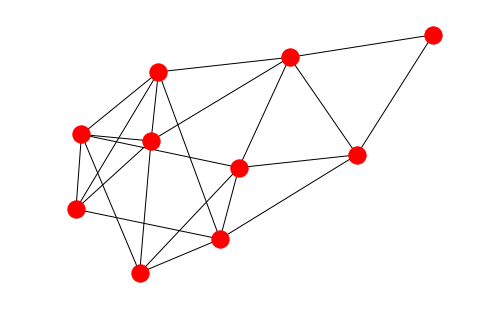

In [197]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random 

N = 10 # Number of agents
C = np.zeros((N,N)) # Connectivity matrix

# The value at index i of this array indicates how many connections agent i can still make. Ideally, when the network has been
# made this array contains only zeros again. Most likely there will be some mismatch due to people inconsistent number of friends
available_connections = np.zeros(N) 

# Sample number of connections for each agent
for i in range(0, N): 
    available_connections[i] = int(random.randint(0, 6)) # At this time it's random, should actually be taken from distribution
    
print('Maximum number of connections agents can have:', available_connections)

# We loop through the agents and set the number of connections to what it should be (if possible)
for i in range(0, N): 
    
    # a is a list of agents that can still be used to make a connection with
    a = [] 
    for j in range(0, N):
        if available_connections[j] > 0 and i != j and C[i,j] == 0:
            a.append(j)
            
    # From the list of available agents a random agent is chosen to make a connection with. Next, the connectivity matrix
    # is updated (symmetrically), the chosen agent is removed from the possible connection list (because one cannot connect to
    # the same agent more than once) and the number of connections of the chosen agent is reduced by one
    for k in range(0, int(available_connections[i])):
        if np.size(a) > 0:   
            connect_with = np.random.choice(a, 1)
            C[i, connect_with] = 1
            C[connect_with, i] = 1
            a.remove(connect_with)
            available_connections[connect_with] -= 1
        else:
            k -= 1
            break
            
    # The number of connections agent i has made is now changed. If it was able to connect to the desired amount of other
    # agents this value is zero. If it could not make all the connections it desired this value is greater than 0.
    if available_connections[i] > 0:
        available_connections[i] -= k + 1    

    
print('Residual of number of connections:', available_connections) # Residual of available connections
print('Final connectivity matrix: \n', C) # Final connectivity matrix

# Plot the network
G = nx.from_numpy_matrix(C)
nx.draw(G)
plt.show()